In [ ]:
from google.colab import drive, files
from pathlib import Path
import sys
drive.mount('/content/drive', force_remount = True)
DATADIR = Path("/content/drive/MyDrive/Colab Notebooks/42-678_Early_Onset_Diabetes_Prediction/Dataset.xlsx")
sys.path.append(str(DATADIR.parent))

Mounted at /content/drive


In [ ]:
# Importing essential libraries
import numpy as np
import pandas as pd
import pickle

In [ ]:
df = pd.read_excel(DATADIR)

In [ ]:
df.head()

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweat,Shiver,Diabetic
0,9.0,79.0,73.0,118.0,98.0,98.300707,99.0,0.0,0.0,0.0
1,9.0,80.0,73.0,119.0,102.0,98.300707,94.0,1.0,0.0,0.0
2,9.0,70.0,76.0,110.0,81.0,98.300707,98.0,1.0,0.0,0.0
3,9.0,70.0,78.0,115.0,96.0,98.300707,96.0,1.0,0.0,0.0
4,66.0,100.0,96.0,144.0,92.0,97.807052,98.0,0.0,0.0,0.0


In [ ]:
df.shape

(16969, 10)

In [ ]:
df = df.drop(columns=['Sweat','Shiver','SPO2'])

In [ ]:
df.head()

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,Diabetic
0,9.0,79.0,73.0,118.0,98.0,98.300707,0.0
1,9.0,80.0,73.0,119.0,102.0,98.300707,0.0
2,9.0,70.0,76.0,110.0,81.0,98.300707,0.0
3,9.0,70.0,78.0,115.0,96.0,98.300707,0.0
4,66.0,100.0,96.0,144.0,92.0,97.807052,0.0


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
X = df.drop(columns='Diabetic')
y = df['Diabetic']

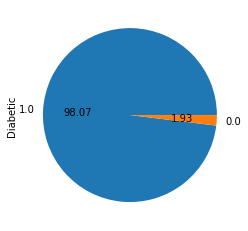

In [ ]:
y.value_counts().plot.pie(autopct='%.2f')

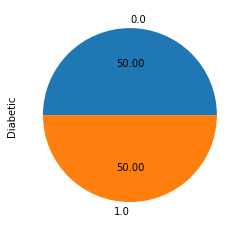

In [ ]:
rus=RandomUnderSampler(sampling_strategy=1)#Sampling Startegy means the ratio
x_res,y_res = rus.fit_resample(X,y)
y_res.value_counts().plot.pie(autopct='%.2f')

In [ ]:
X=x_res
y=y_res

In [ ]:
X

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature
0,9.0,79.0,73.0,118.0,98.0,98.300707
1,9.0,80.0,73.0,119.0,102.0,98.300707
2,9.0,70.0,76.0,110.0,81.0,98.300707
3,9.0,70.0,78.0,115.0,96.0,98.300707
4,66.0,100.0,96.0,144.0,92.0,97.807052
...,...,...,...,...,...,...
651,14.0,73.0,83.0,111.0,87.0,96.397322
652,14.0,95.0,71.0,119.0,86.0,98.828835
653,9.0,102.0,76.0,118.0,88.0,98.960389
654,14.0,79.0,89.0,126.0,84.0,97.480831


In [ ]:
# Model Building
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 18)

In [ ]:
X_test

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature
188,36.0,73.0,90.0,125.0,86.0,98.123486
500,55.0,102.0,77.0,127.0,84.0,97.321919
477,55.0,117.0,73.0,113.0,95.0,96.382560
306,51.0,100.0,75.0,127.0,103.0,97.690095
247,44.0,71.0,93.0,125.0,88.0,98.199136
...,...,...,...,...,...,...
25,9.0,80.0,70.0,113.0,80.0,97.752192
9,9.0,80.0,78.0,118.0,96.0,98.007890
179,30.0,71.0,86.0,140.0,104.0,98.092626
145,36.0,70.0,71.0,130.0,103.0,98.393525


In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
 !pip install scikit-learn==0.24.2

     |████████████████████████████████| 22.3 MB 3.9 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


In [ ]:
scikit-learn==0.24.2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
# Train the model using the training sets
knn.fit(X_train,y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import matthews_corrcoef,f1_score,accuracy_score
knn_train_mcc = matthews_corrcoef(y_train, y_train_pred)
knn_train_accuracy = accuracy_score(y_train, y_train_pred)
knn_train_f1_score=f1_score(y_train, y_train_pred,average='weighted')
print("F1-Score: ",knn_train_f1_score*100)
print("Accuracy Score: ",knn_train_accuracy*100)
print("MCC: ",knn_train_mcc*100)

F1-Score:  96.3733194247118
Accuracy Score:  96.37404580152672
MCC:  92.83242373849562


In [ ]:
#Testing Data Set
knn_test_mcc = matthews_corrcoef(y_test, y_test_pred)
knn_test_accuracy = accuracy_score(y_test, y_test_pred)
knn_test_f1_score=f1_score(y_test, y_test_pred,average='weighted')
print("F1-Score: ",knn_test_f1_score*100)
print("Accuracy Score: ",knn_test_accuracy*100)
print("MCC: ",knn_test_mcc*100)

F1-Score:  94.6801132751546
Accuracy Score:  94.6969696969697
MCC:  89.59551873772324


In [ ]:
#Neural Network
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(alpha=2, max_iter=1000)
mlp.fit(X_train, y_train)

y_train_pred=mlp.predict(X_train)
y_test_pred=mlp.predict(X_test)

#Training Data Set
print("--------------------TRAINING DATA-----------")
from sklearn.metrics import matthews_corrcoef,f1_score,accuracy_score
mlp_train_mcc = matthews_corrcoef(y_train, y_train_pred)
mlp_train_accuracy = accuracy_score(y_train, y_train_pred)
mlp_train_f1_score=f1_score(y_train, y_train_pred,average='weighted')
print("F1-Score: ",mlp_train_f1_score*100)
print("Accuracy Score: ",mlp_train_accuracy*100)
print("MCC: ",mlp_train_mcc*100)
print("--------------------TESTING DATA-----------")
#Testing Data Set
mlp_test_mcc = matthews_corrcoef(y_test, y_test_pred)
mlp_test_accuracy = accuracy_score(y_test, y_test_pred)
mlp_test_f1_score=f1_score(y_test, y_test_pred,average='weighted')
print("F1-Score: ",mlp_test_f1_score*100)
print("Accuracy Score: ",mlp_test_accuracy*100)
print("MCC: ",mlp_test_mcc*100)

--------------------TRAINING DATA-----------
F1-Score:  88.52385630011884
Accuracy Score:  88.54961832061069
MCC:  77.3479546085704
--------------------TESTING DATA-----------
F1-Score:  84.75073313782991
Accuracy Score:  84.84848484848484
MCC:  71.52788127344198


In [ ]:
# Creating a pickle file for the classifier
filename = '/content/drive/MyDrive/Colab Notebooks/42-678_Early_Onset_Diabetes_Prediction/diabetes-prediction-rfc-model.pkl'
pickle.dump(knn, open(filename, 'wb'))

In [ ]:
with open(filename,'rb') as file:
  data = pickle.load(file)

In [ ]:
dict = {'Age': [3],'Blood Glucose Level(BGL)': [80],'Diastolic Blood Pressure': [60],'Systolic Blood Pressure': [100],'Heart Rate': [80],'Body Temperature': [98]}
test = pd.DataFrame(dict)
predicted = data.predict(test)